Exploration: Looking at localidades in Tijuana.

Data Source: [INEGI's Marco geoestadístico](https://www.inegi.org.mx/temas/mapas/mg/)

In [1]:
import pandas as pd
import geopandas as gpd
from pathlib import Path
import matplotlib.pyplot as plt
from useful_funcs import tree
from zipfile import ZipFile
%matplotlib inline

In [2]:
raw_data_path = Path("../data/raw/")
interim_data_path = Path("../data/interim")

interim_figures_path = Path("../reports/figures/interim/")

In [3]:
raw_data = ZipFile((raw_data_path / '02_bajacalifornia.zip'))

In [4]:
raw_data.extractall(interim_data_path / '02_bajacalifornia',)

In [5]:
extracted_files_path = Path(interim_data_path / '02_bajacalifornia')

In [6]:
tree(extracted_files_path)

+ ..\data\interim\02_bajacalifornia
    + catalogos
        + contenido.pdf
        + contenido.txt
        + descripci≤n_de_la_obra.pdf
        + descripci≤n_de_la_obra.txt
        + entidades_federativas.csv
        + entidades_federativas.pdf
        + localidades_isla.csv
        + localidades_isla.pdf
        + localidades_rurales_que_rebasan_su_municipio.csv
        + localidades_rurales_que_rebasan_su_municipio.pdf
        + localidades_urbanas_que_rebasan_su_municipio.csv
        + localidades_urbanas_que_rebasan_su_municipio.pdf
        + localidades_urbanas_y_rurales_amanzanadas.csv
        + localidades_urbanas_y_rurales_amanzanadas.pdf
        + lΘeme.pdf
        + lΘeme.txt
        + municipios.csv
        + municipios.pdf
        + sφntesis.pdf
        + sφntesis.txt
    + conjunto de datos
        + 02a.CPG
        + 02a.dbf
        + 02a.prj
        + 02a.shp
        + 02a.shx
        + 02ar.cpg
        + 02ar.dbf
        + 02ar.prj
        + 02ar.shp
        + 02ar.shx

From `contenidos.pdf`:

    Nombre y Contenido de los Archivos Vectoriales
    Los nombres de archivos se conforman con las claves geoestadísticas (numéricas) de la
    entidad federativa y la capa con sufijos descriptivos del contenido del archivo:
    Donde:
    ee corresponde a la clave numérica de la entidad federativa: 01, 02,…32 (ver entidades
    federativas.pdf).

| Nombre | capa  |
|:------:|:-----:|
| ee**ent** | Áreas geoestadísticas estatales |
| ee**mun** | Áreas geoestadísticas municipales |
| ee**ar** | Áreas geoestadísticas básicas rurales |
| ee**l** | Polígono de localidades urbanas y rurales amanzanadas |
| ee**lpr** | Localidades puntuales rurales |
| ee**ti** | Territorio insular |
| ee**a** | Áreas geoestadísticas básicas urbanas |
| ee**m** | Polígonos de manzana |
| ee**fm** | Frentes de manzana |
| ee**e** | Ejes de vialidad |
| ee**cd** | Caserío disperso |
| ee**sia** | Servicios e información complementaria de Tipo área (áreas verdes, camellones, glorietas) |
| ee**sil** | Servicios e información complementaria de Tipo línea (ríos, ferrocarriles, corrientes de agua) |
| ee**sip** | Servicios e información complementaria de Tipo puntual (palacios municipales o ayudantías, parques o jardines) |
| ee**pe** | Polígono externo |
| ee**pem** | Polígono externo de manzana |
| ee**ue** | Unidades económicas | 


* saved in `docs/` as `"catalogo_archivos.csv"`

In [7]:
docs_path = Path("../docs/")
catalogo = pd.read_csv(docs_path / 'catalogo_archivos.csv')

archivos = {}
for index, row in catalogo.iterrows():
    archivos[row[0]] = row[1]
    
archivos

{'02ent': 'Áreas geoestadísticas estatales',
 '02mun': 'Áreas geoestadísticas municipales',
 '02ar': 'Áreas geoestadísticas básicas rurales',
 '02l': 'Polígono de localidades urbanas y rurales amanzanadas',
 '02lpr': 'Localidades puntuales rurales',
 '02ti': 'Territorio insular',
 '02a': 'Áreas geoestadísticas básicas urbanas',
 '02m': 'Polígonos de manzana',
 '02fm': 'Frentes de manzana',
 '02e': 'Ejes de vialidad',
 '02cd': 'Caserío disperso',
 '02sia': 'Servicios e información complementaria de Tipo área (áreas verdes, camellones, glorietas)',
 '02sil': 'Servicios e información complementaria de Tipo línea (ríos, ferrocarriles, corrientes de agua)',
 '02sip': 'Servicios e información complementaria de Tipo puntual (palacios municipales o ayudantías, parques o jardines)',
 '02pe': 'Polígono externo',
 '02pem': 'Polígono externo de manzana',
 '02ue': 'Unidades económicas'}

working on 02a.shp
working on 02ar.shp
working on 02cd.shp
working on 02e.shp
working on 02ent.shp
working on 02fm.shp
working on 02l.shp
working on 02lpr.shp
working on 02m.shp
working on 02mun.shp
working on 02pe.shp
working on 02sia.shp
working on 02sil.shp
working on 02sip.shp
working on 02ti.shp


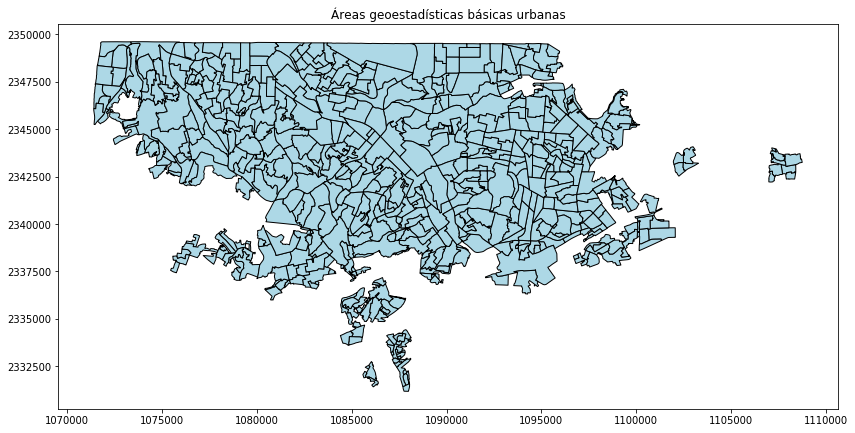

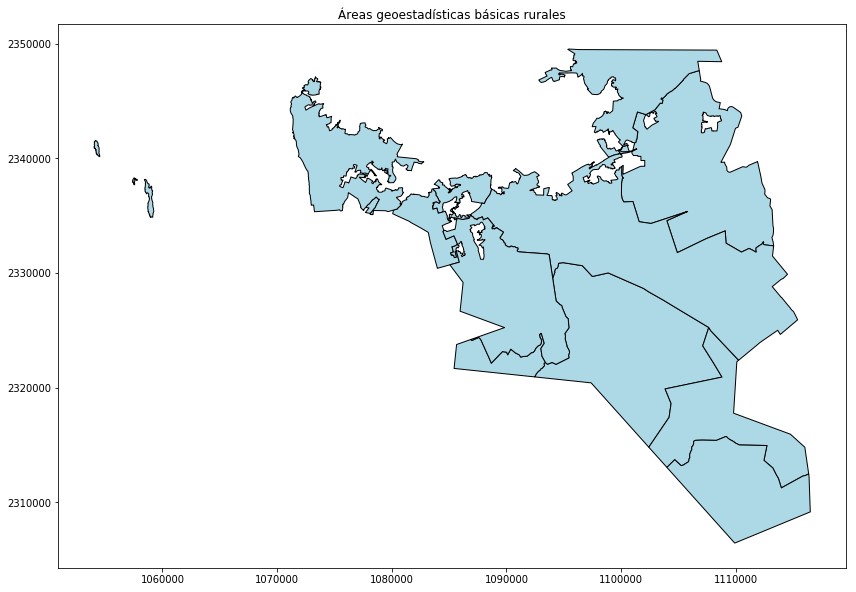

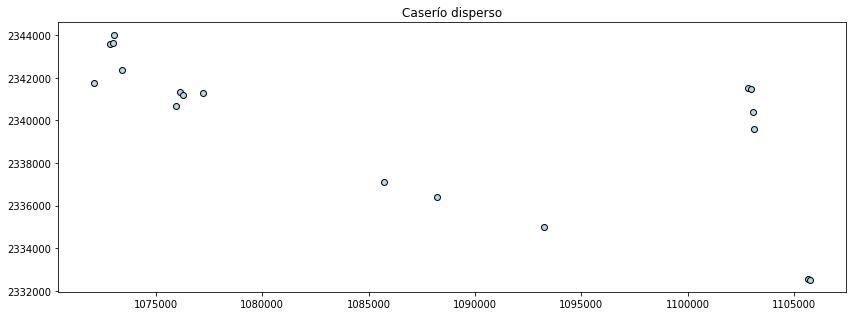

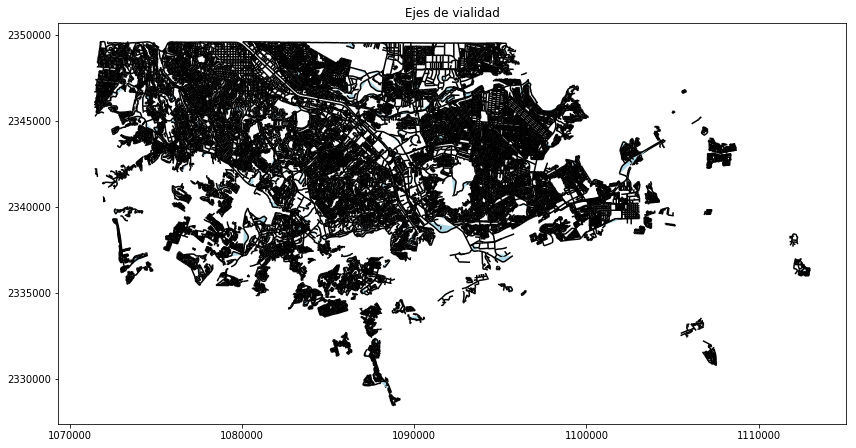

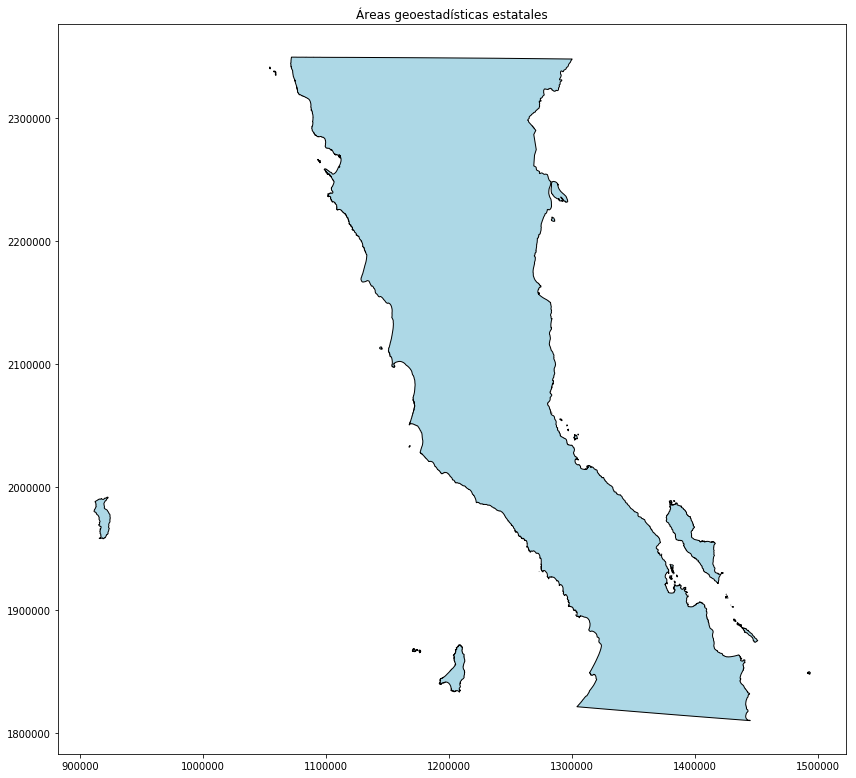

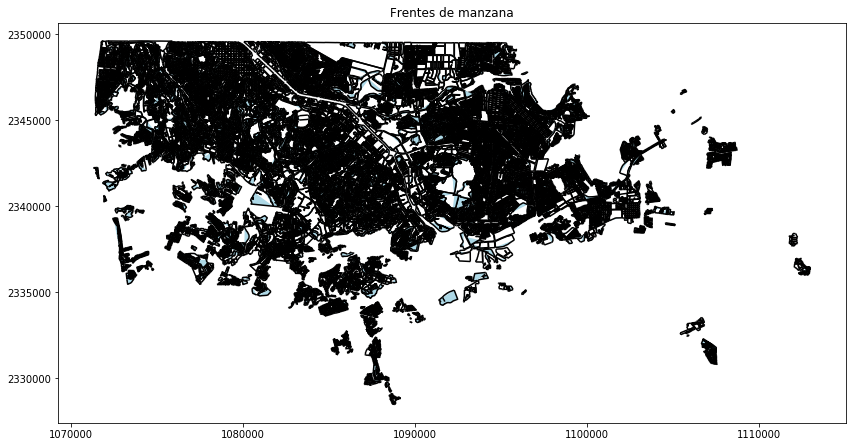

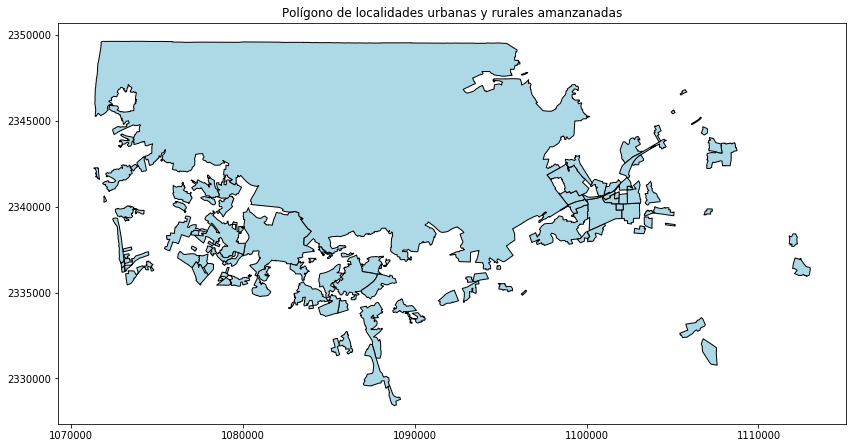

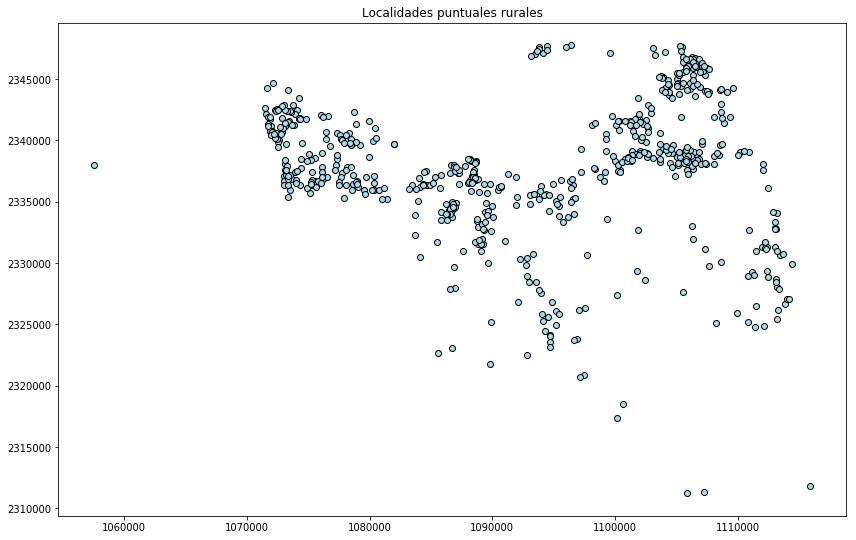

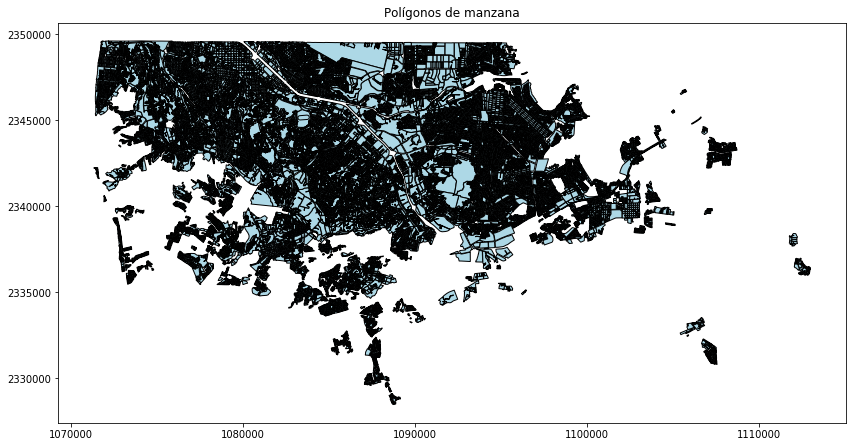

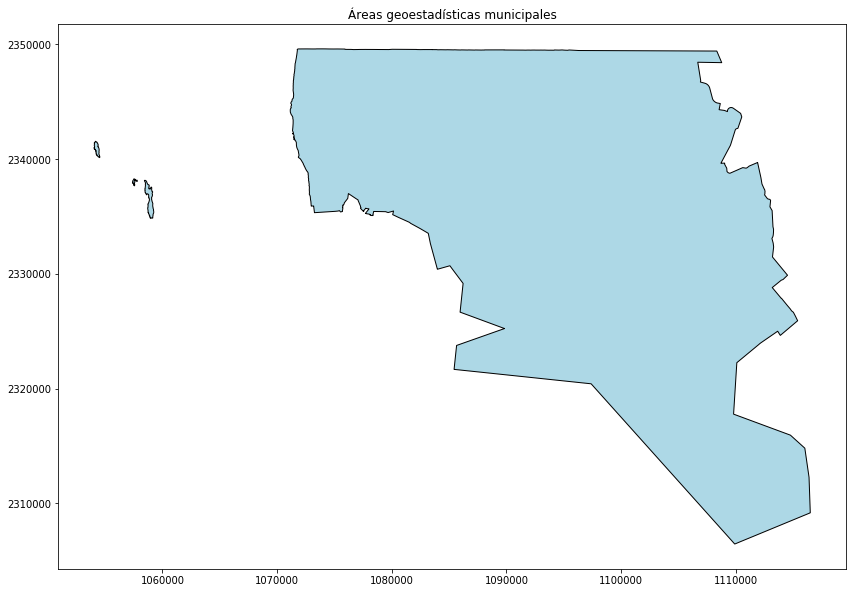

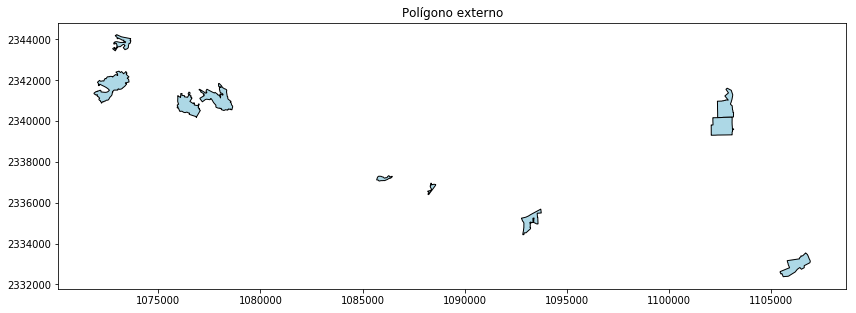

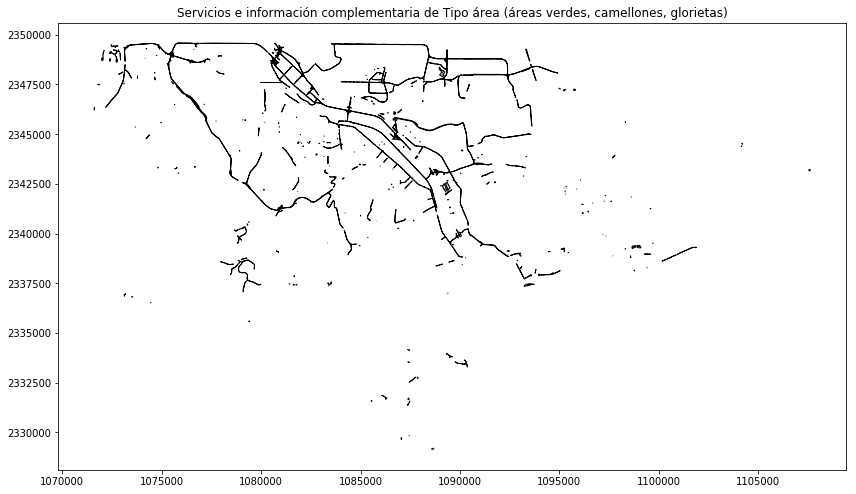

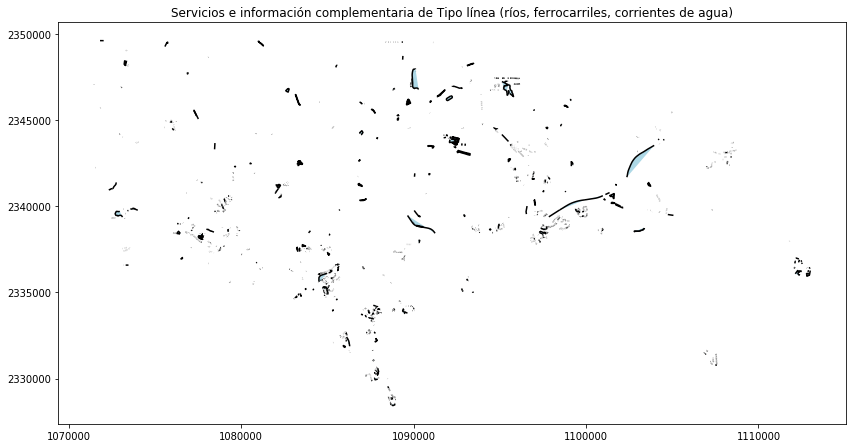

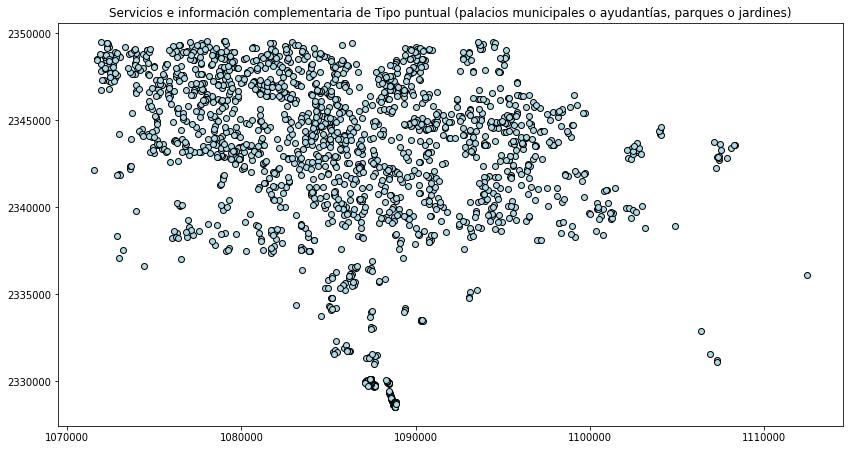

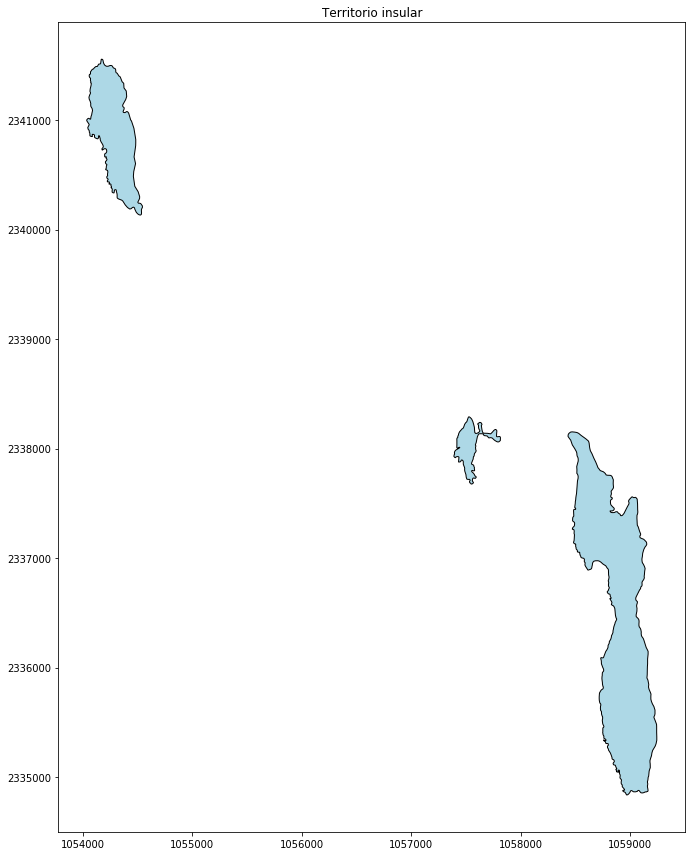

In [8]:
for shape_file in (extracted_files_path / 'conjunto de datos').glob("*.shp"):
    #print(shape_file.stem)
    data = gpd.read_file(shape_file)
    print(f"working on {shape_file.name}",)
    if 'CVE_MUN' in data.columns:
        tijuana = data[data['CVE_MUN'] == '004']
        # make map
        fig, ax = plt.subplots(figsize = (12,12))
        tijuana.plot(ax = ax, edgecolor = 'black', facecolor = 'lightblue')
        ax.set_title(archivos[shape_file.stem]);
        plt.tight_layout()
        plt.savefig(interim_figures_path / shape_file.stem, dpi = 300,)
    else:
        fig, ax = plt.subplots(figsize = (12,12))
        data.plot(ax = ax, edgecolor = 'black', facecolor = 'lightblue')
        ax.set_title(archivos[shape_file.stem]);
        plt.tight_layout()
        plt.savefig(interim_figures_path / shape_file.stem, dpi = 300,)

In [9]:
polygons = gpd.read_file(extracted_files_path / "conjunto de datos" / "02l.shp")

polygons.head()

,CVEGEO,CVE_ENT,CVE_MUN,CVE_LOC,NOMGEO,AMBITO,geometry
0,020010046,02,001,0046,Bahía de los Ángeles,Rural,"POLYGON ((1376031.659500002 1922257.678599996,..."
1,020010078,02,001,0078,Ejido Chapala,Rural,"POLYGON ((1155685.795900002 2114254.7181, 1155..."
2,020010114,02,001,0114,Francisco Zarco (Valle de Guadalupe),Urbana,"POLYGON ((1117722.200000004 2296561.765799997,..."
3,020010118,02,001,0118,Licenciado Gustavo Díaz Ordaz,Rural,"POLYGON ((1145571.260200001 2168076.155400002,..."
4,020010121,02,001,0121,La Huerta,Rural,"POLYGON ((1158486.9926 2273717.310599998, 1158..."


From other sources (INEGI) we know Tijuana's _Clave Municipal_ or `CVE_MUN` is "004"

In [10]:
tijuana = polygons[polygons['CVE_MUN'] == '004']

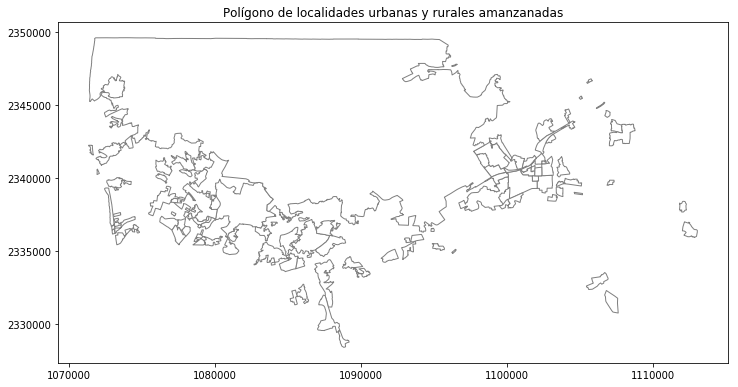

In [11]:
fig, ax = plt.subplots(figsize = (12,12))
tijuana.plot(ax = ax, edgecolor = 'gray', facecolor = 'white');
ax.set_title("Polígono de localidades urbanas y rurales amanzanadas");